In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('diabetes2.csv', delimiter = ',', dtype = np.float64, skip_header = 1)

In [3]:
data.shape

(768, 9)

In [4]:
test_size = int(0.2*data.shape[0])
test_size

153

In [5]:
np.random.seed(194)
shuffle_idx = np.random.permutation(data.shape[0])

In [6]:
test_data, train_data = data[shuffle_idx[:test_size], :], data[shuffle_idx[test_size:], :]
X = train_data[:, :-1].T
Y = train_data[:, -1:].T
test_X = test_data[:, :-1].T
test_Y = test_data[:, -1:].T

In [7]:
print(test_X.shape, test_Y.shape, X.shape, Y.shape)
n = X.shape[0]
m = Y.shape[1]

(8, 153) (1, 153) (8, 615) (1, 615)


In [8]:
X_mean = np.mean(X, axis = 1, keepdims = True)
X_max = np.max(X, axis = 1, keepdims = True)
X_min = np.min(X, axis = 1, keepdims = True)

X = (X-X_mean)/(X_max-X_min)
test_X = (test_X-X_mean)/(X_max-X_mean)

In [9]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def calc_accuracy(Y, A):
    m = Y.shape[1]
    pred_Y = np.zeros((1, m))
    pred_Y = 1.*(A > 0.5)
    correct = np.sum(1*(pred_Y == Y))/m
    return correct

Epoch = 0: (Loss: 0.6931471805599453, Correctness: 0.6504065040650406
Epoch = 10: (Loss: 0.6030125641945855, Correctness: 0.7008130081300813
Epoch = 20: (Loss: 0.5316435188236093, Correctness: 0.734959349593496
Epoch = 30: (Loss: 0.5098228578507843, Correctness: 0.7609756097560976
Epoch = 40: (Loss: 0.5035705856109673, Correctness: 0.7642276422764228
Epoch = 50: (Loss: 0.5003527240539022, Correctness: 0.7626016260162601
Epoch = 60: (Loss: 0.4983408507316428, Correctness: 0.7609756097560976
Epoch = 70: (Loss: 0.49702976293460815, Correctness: 0.7626016260162601
Epoch = 80: (Loss: 0.4961527875327152, Correctness: 0.767479674796748
Epoch = 90: (Loss: 0.4955544456381588, Correctness: 0.767479674796748
Epoch = 100: (Loss: 0.49513981058807655, Correctness: 0.7691056910569106
Epoch = 110: (Loss: 0.4948488517441459, Correctness: 0.7691056910569106
Epoch = 120: (Loss: 0.49464254972906624, Correctness: 0.7707317073170732
Epoch = 130: (Loss: 0.4944949845828527, Correctness: 0.7723577235772358


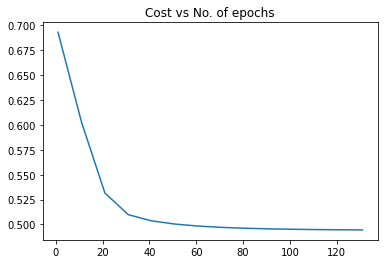

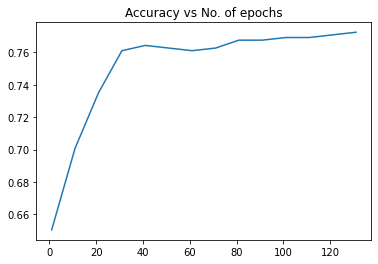

In [10]:
W = np.zeros((n, 1))
b = 0

epochs = 150
alpha = 10

loss = []
cost_old = np.Inf
accuracy = []
iterations = []

for i in range(epochs):
    Z = np.dot(W.T, X)+b
    A = sigmoid(Z)   
    
    dZ = A - Y
    dW = (1/m)*(np.dot(X, dZ.T))
    db = (1/m)*(np.sum(dZ))
    
    W = W - alpha*dW
    b = b - alpha*db
    
    cost = (-1./m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) 
    correct = calc_accuracy(Y, A)
    
    if(abs(cost - cost_old) < 10**(-5)):
        break
    
    cost_old = cost
    
    if(i%10 == 0):
        iterations.append(i+1)
        loss.append(cost)
        accuracy.append(correct)
        print("Epoch = " + str(i) + ": (Loss: "+ str(cost) + ', Correctness: ' + str(accuracy[-1]))
    #print(cost, correct)

plt.plot(iterations, loss)
plt.title("Cost vs No. of epochs")
plt.show()
plt.plot(iterations, accuracy)
plt.title("Accuracy vs No. of epochs")
plt.show()

In [12]:
A = sigmoid(np.dot(W.T, test_X)+b)
print("Test Accuracy = " + str(calc_accuracy(test_Y, A)*100) + " %")


Test Accuracy = 84.31372549019608 %
